# Understand Embedding layer

## Reformatting embedding activations shape

Using flatten and reshape

In [1]:
import keras
import pandas as pd

from keras.models import Sequential
from keras.layers import *

In [2]:
model = keras.models.load_model('./models/bycountry_model')
new_model = Sequential()
new_model.add(model.layers[0])
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 64)           640000    
                                                                 
Total params: 640,000
Trainable params: 640,000
Non-trainable params: 0
_________________________________________________________________


In [3]:
df = pd.read_json('./data/bycountry_ds.json')
df.head()

,category,input,output_low,output_medium,output_high
http://dbpedia.org/resource/...All_the_Marbles,[United States],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,1,0
http://dbpedia.org/resource/An_Eye_for_an_Eye_(1981_film),[United States],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,1,0
http://dbpedia.org/resource/Brain_Dead_(1990_film),[United States],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,1,0
http://dbpedia.org/resource/For_Pete's_Sake_(film),[United States],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,1,0
http://dbpedia.org/resource/Hannah_Montana:_The_Movie,[United States],"[25, 6677, 48, 2, 138, 5, 331, 1, 7, 25, 6983,...",0,0,1


In [ ]:
category = "France"
dfc = df[df.category.apply(lambda x: category in x)]
dfc.shape

In [ ]:
inputs = [x for x in dfc.input]
activations = new_model.predict(inputs)
activations.shape

In [ ]:
flatten_activations = activations.flatten()
flatten_activations.shape

In [ ]:
activations = flatten_activations.reshape(64, -1)

In [ ]:
emb_activations = pd.DataFrame(activations)
emb_activations.shape

In [ ]:
emb_activations

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(emb_activations.T)
plt.show()

In [18]:
emb_activations = pd.DataFrame(activations)
emb_activations.shape

(64, 172500)

In [19]:
emb_activations

,0,1,2,3,4,5,6,7,8,9,...,172490,172491,172492,172493,172494,172495,172496,172497,172498,172499
0,0.039747,-0.019695,-0.034212,0.013875,-0.006768,-0.027497,-0.002492,0.006977,-0.012125,-0.005127,...,0.026994,-0.027270,0.044301,-0.003282,0.009113,-0.031883,0.012122,0.012199,-0.034591,-0.044724
1,0.004136,-0.044069,-0.026330,0.014334,0.006262,-0.035856,0.052555,0.000620,-0.003319,0.020689,...,0.041110,-0.007890,0.079234,0.132065,-0.060945,-0.045183,0.019824,-0.017475,0.054438,0.061667
2,0.107482,0.045187,-0.065456,0.014599,-0.056629,-0.033741,0.007268,-0.117252,-0.029265,-0.016739,...,0.100185,0.017599,-0.063055,-0.010288,0.082297,0.063710,-0.050840,-0.010801,0.016340,-0.041572
3,0.010063,-0.029014,0.034668,-0.083912,-0.040217,-0.035804,-0.005709,-0.017026,-0.015348,0.018394,...,-0.053193,-0.092224,0.029536,0.117636,0.030297,0.036010,-0.034745,-0.001071,-0.009003,-0.018248
4,0.025833,0.035687,-0.005509,0.015895,-0.019848,-0.051991,-0.033430,-0.057455,0.053400,-0.001698,...,0.025879,0.002695,-0.016780,-0.016574,-0.016934,0.017754,0.040748,-0.010469,0.015730,0.055091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,-0.016780,-0.016574,-0.016934,0.017754,0.040748,-0.010469,0.015730,0.055091,0.020319,0.002041,...,-0.330534,-0.013534,0.010805,0.017232,-0.007957,0.027219,-0.001712,0.005996,-0.013042,-0.003036
60,-0.011158,0.018347,-0.014151,-0.022551,-0.000939,-0.033253,-0.012630,0.002452,0.037097,-0.012935,...,0.038586,0.005274,0.073991,-0.000422,0.001140,0.085913,0.039747,-0.019695,-0.034212,0.013875
61,-0.006768,-0.027497,-0.002492,0.006977,-0.012125,-0.005127,0.009123,0.004264,-0.020737,-0.015645,...,-0.016899,-0.013940,0.000209,0.075470,0.021847,-0.020349,-0.022059,0.008599,0.055241,-0.004922
62,-0.016596,-0.022298,0.025879,0.002695,-0.016780,-0.016574,-0.016934,0.017754,0.040748,-0.010469,...,0.015730,0.055091,0.020319,0.002041,-0.330534,-0.013534,0.010805,0.017232,-0.007957,0.027219


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

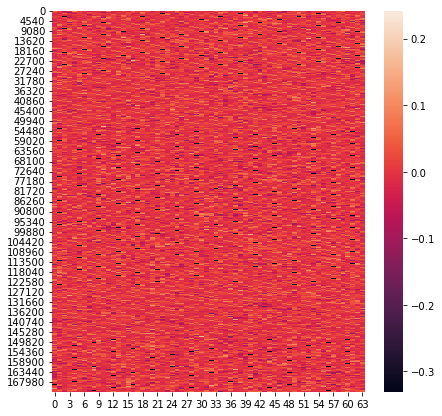

In [23]:
plt.figure(figsize=(7,7))
sns.heatmap(emb_activations.T)
plt.show()